## 2D Projection Process

### Required Data Components

#### 1. **3D LiDAR Points**
- **Source**: `zod_frame.get_aggregated_lidar()`
- **Format**: Point cloud with (x, y, z) coordinates in meters
- **Reference Frame**: LiDAR sensor coordinate system
- **Data**: Distance measurements from rotating laser scanner

#### 2. **Camera Calibration Matrix**
- **Source**: `zod_frame.calibration`
- **Purpose**: Defines camera intrinsic parameters (focal length, principal point)
- **Format**: 3x3 matrix transforming 3D camera coordinates to 2D pixels
- **Essential For**: Perspective projection from 3D to 2D

#### 3. **LiDAR-Camera Extrinsic Transformation**
- **Source**: Part of `zod_frame.calibration`
- **Purpose**: Transforms points from LiDAR to camera coordinate system
- **Format**: 4x4 transformation matrix (rotation + translation)
- **Converts**: LiDAR coordinates → Camera coordinates

#### 4. **Timestamp Synchronization**
- **Source**: `zod_frame.info.keyframe_time.timestamp()`
- **Purpose**: Ensures LiDAR and camera data temporal alignment
- **Critical**: LiDAR and camera must capture same scene moment

## Projection Mathematics

### Step-by-Step Process

1. **Get 3D Points**: LiDAR returns (x, y, z) in LiDAR coordinate system
2. **Transform Coordinates**: Apply extrinsic matrix to convert LiDAR → Camera coordinates
3. **Perspective Projection**: Apply intrinsic matrix to project 3D → 2D pixels
4. **Depth Coloring**: Color points based on distance from camera
5. **Render**: Draw colored points on white canvas matching camera dimensions

### Key Formula
```
2D_pixel = K × [R|t] × 3D_lidar_point
```
Where:
- `K` = Camera intrinsic matrix (3x3)
- `[R|t]` = Extrinsic transformation matrix (4x4)
- `3D_lidar_point` = LiDAR point in homogeneous coordinates

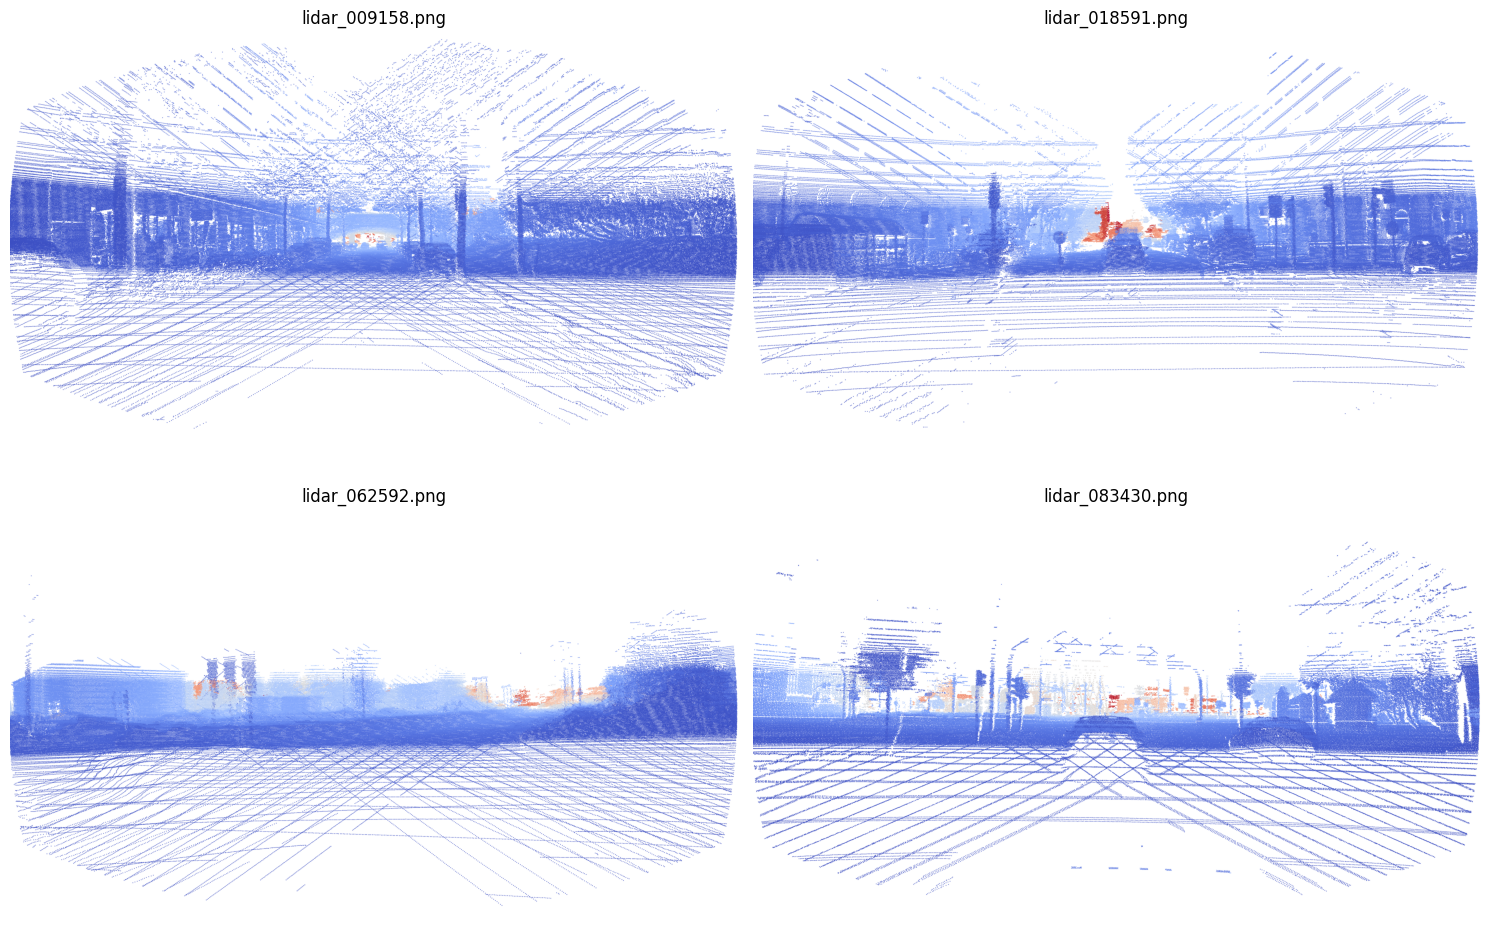

In [1]:
# Display example LiDAR projections
import matplotlib.pyplot as plt
from PIL import Image
import os

example_files = ["lidar_009158.png", "lidar_018591.png", "lidar_062592.png", "lidar_083430.png"]
output_dir = "../output/lidar"

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, filename in enumerate(example_files):
    filepath = os.path.join(output_dir, filename)
    
    if os.path.exists(filepath):
        img = Image.open(filepath)
        axes[i].imshow(img)
        axes[i].set_title(f'{filename}', fontsize=12)
        axes[i].axis('off')
    else:
        axes[i].text(0.5, 0.5, f'File not found:\n{filename}', 
                    ha='center', va='center', transform=axes[i].transAxes)

plt.tight_layout()
plt.show()